In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
archivo = 'clean_data.csv'

df = pd.read_csv(archivo)


In [4]:
df

,Date,Country,State,Activity,Sex,Age,Deceased,Month,Year
0,2022-09-01,south africa,WESTERN CAPE PROVINCE,swimming,F,39.0,Y,September,2022.0
1,2022-09-01,bahamas,NaN,diving,F,58.0,Y,September,2022.0
2,2022-09-01,usa,HAWAII,swimming,F,51.0,N,September,2022.0
3,2022-08-01,australia,NEW SOUTH WALES,surfing,M,14.0,N,August,2022.0
4,2022-08-01,australia,NEW SOUTH WALES,kayaking,M,NaN,N,August,2022.0
...,...,...,...,...,...,...,...,...,...
6376,NaN,italy,SARDINIA,swimming,M,NaN,Y,NaN,NaN
6377,1703-03-01,barbados,SOUTHWEST COAST,swimming,M,19.0,N,March,1703.0
6378,NaN,france,NaN,Unspecific,M,NaN,Y,NaN,NaN
6379,NaN,france,CÔTE D'AZUR,Unspecific,M,NaN,N,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6381 entries, 0 to 6380
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5975 non-null   object 
 1   Country   6358 non-null   object 
 2   State     6008 non-null   object 
 3   Activity  6381 non-null   object 
 4   Sex       6381 non-null   object 
 5   Age       3672 non-null   float64
 6   Deceased  6381 non-null   object 
 7   Month     5975 non-null   object 
 8   Year      5975 non-null   float64
dtypes: float64(2), object(7)
memory usage: 448.8+ KB


In [6]:
# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

/var/folders/fp/jszwfm992pqbnc932hlygpjr0000gn/T/ipykernel_22524/1386190224.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Month', palette=paleta_colores)
/var/folders/fp/jszwfm992pqbnc932hlygpjr0000gn/T/ipykernel_22524/1386190224.py:14: UserWarning: The palette list has more values (13) than needed (12), which may not be intended.
  sns.countplot(data=df, x='Month', palette=paleta_colores)


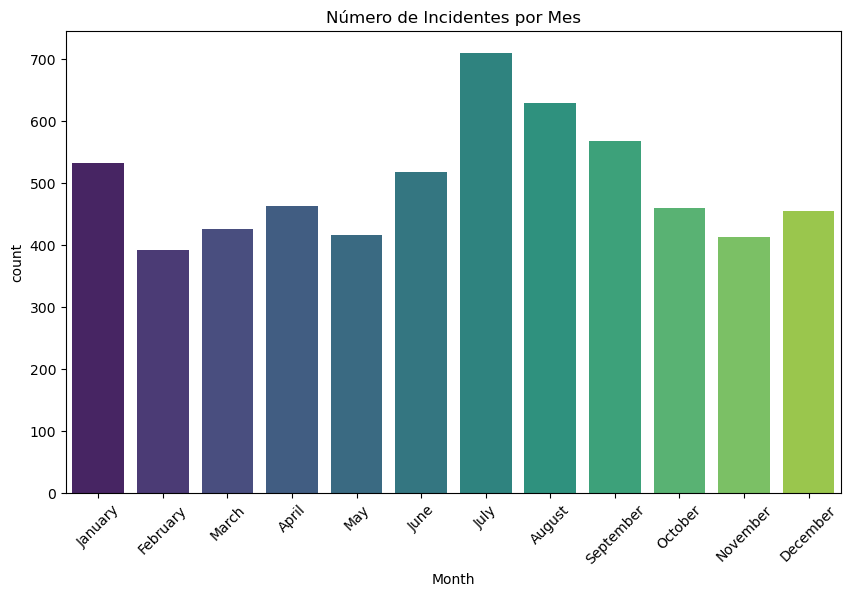

In [8]:
# PRUEBA PRIMER GRÁFICO
df['Month'] = df['Date'].dt.month_name()  # Extraer el nombre del mes

# Crear un nuevo DataFrame con el orden correcto de los meses
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=meses_ordenados, ordered=True)

# Definir una paleta de colores
paleta_colores_azul = sns.color_palette("Blues", n_colors=len(df['Month'].unique()))

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', palette=paleta_colores)
plt.title('Número de Incidentes por Mes')
plt.xticks(rotation=45)  # Opcional, para mejorar la legibilidad
plt.show()

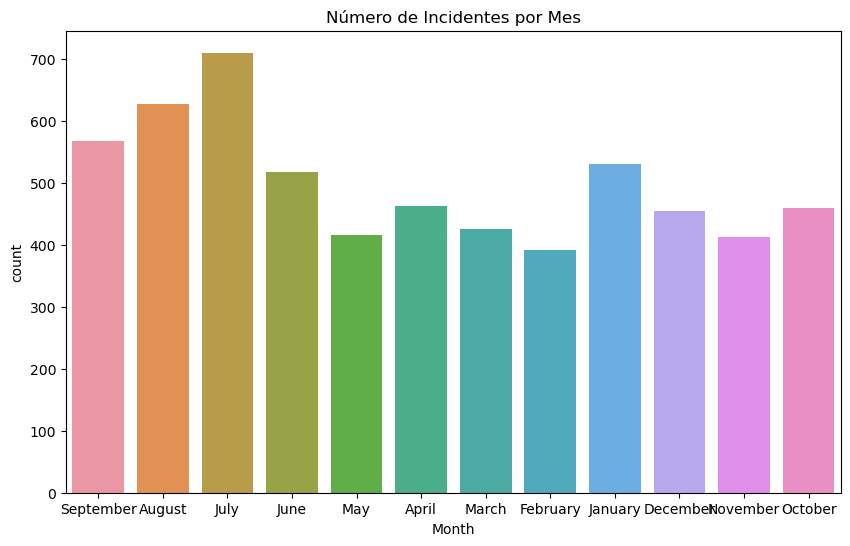

In [10]:
# Gráfico del número de incidentes por mes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month')
plt.title('Número de Incidentes por Mes')
plt.show()


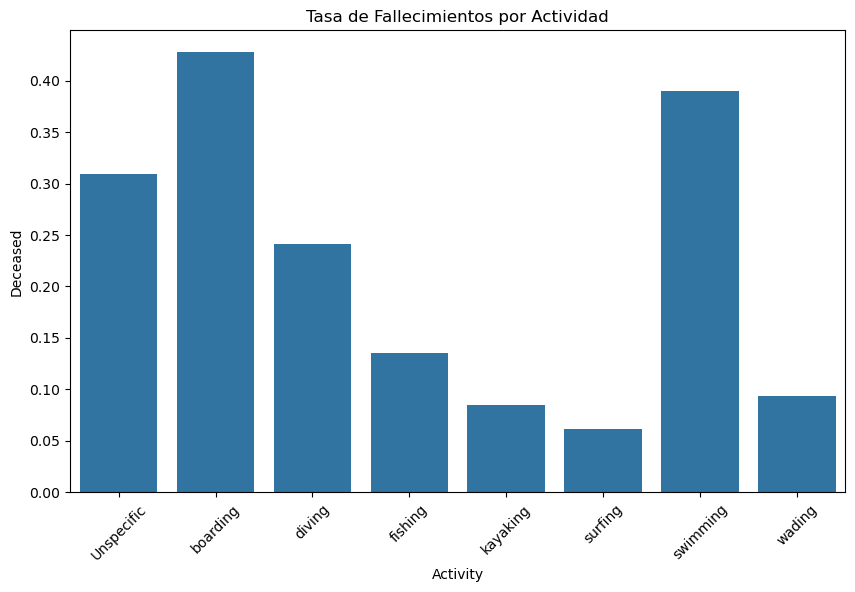

In [10]:
# Gráfico de tasa de fallecimientos por actividad
df['Deceased'] = df['Deceased'].map({'Y': 1, 'N': 0})
activity_deaths = df.groupby('Activity')['Deceased'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=activity_deaths, x='Activity', y='Deceased')
plt.title('Tasa de Fallecimientos por Actividad')
plt.xticks(rotation=45)
plt.show()


/var/folders/fp/jszwfm992pqbnc932hlygpjr0000gn/T/ipykernel_22524/2437844765.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=activity_deaths, x='Activity', y='Deceased',


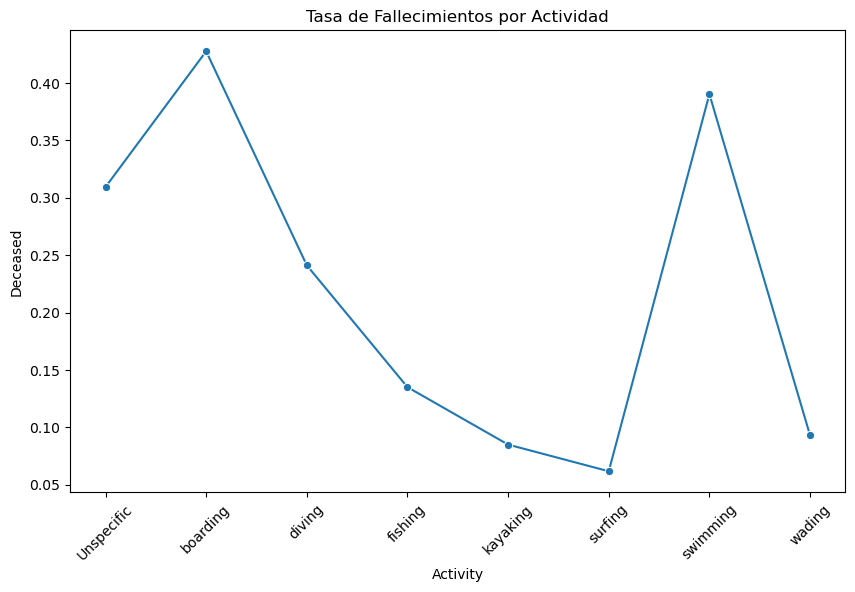

In [11]:
# PRUEBA SEGUNDO GRÁFICO

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
sns.lineplot(data=activity_deaths, x='Activity', y='Deceased', 
             marker='o', palette=sns.color_palette("Blues", n_colors=len(activity_deaths)))
plt.title('Tasa de Fallecimientos por Actividad')
plt.xticks(rotation=45)
plt.show()

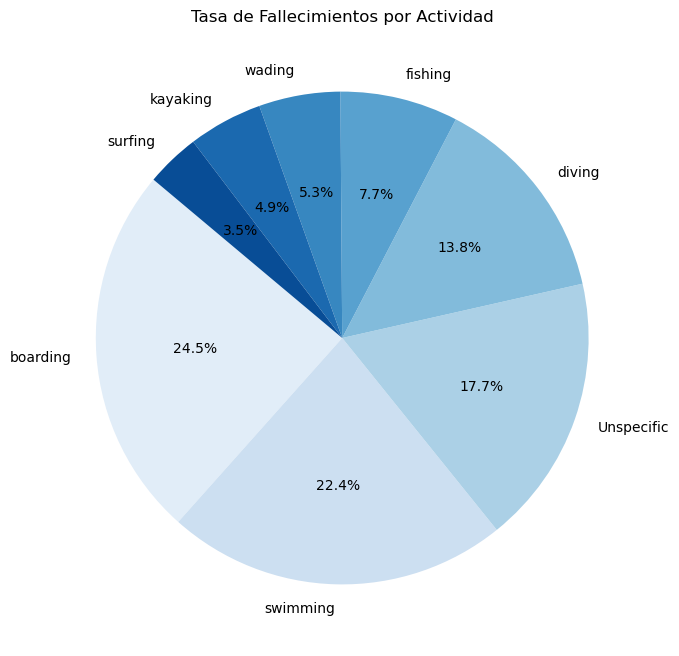

In [14]:
# PRUEBA 2 SEGUNDO GRÁFICO

plt.figure(figsize=(8, 8))
activity_deaths_sorted = activity_deaths.sort_values(by='Deceased', ascending=False)
plt.pie(activity_deaths_sorted['Deceased'], labels=activity_deaths_sorted['Activity'], 
        colors=sns.color_palette("Blues", n_colors=len(activity_deaths_sorted)),
        autopct='%1.1f%%', startangle=140)
plt.title('Tasa de Fallecimientos por Actividad')
plt.show()

/var/folders/fp/jszwfm992pqbnc932hlygpjr0000gn/T/ipykernel_22524/244360174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=activity_deaths, y='Activity', x='Deceased',


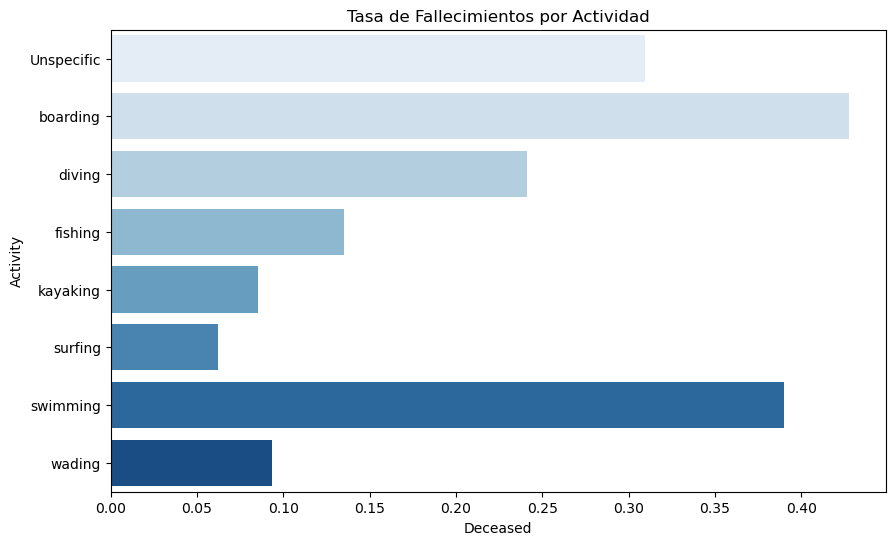

In [15]:
# PRUEBA 3 SEGUNDO GRÁFICO

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(data=activity_deaths, y='Activity', x='Deceased', 
            palette=sns.color_palette("Blues", n_colors=len(activity_deaths)))
plt.title('Tasa de Fallecimientos por Actividad')
plt.show()


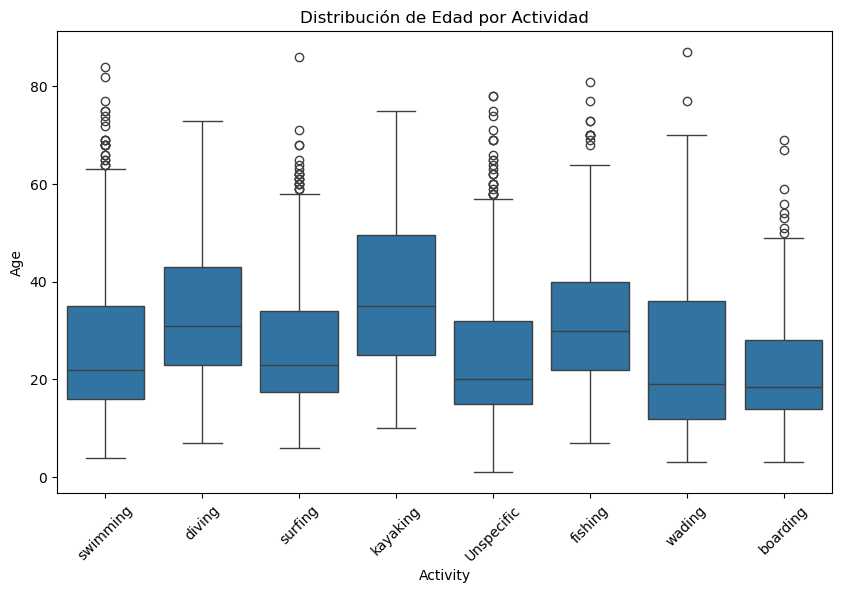

In [17]:
# Boxplot de edad por actividad
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Activity', y='Age')
plt.title('Distribución de Edad por Actividad')
plt.xticks(rotation=45)
plt.show()

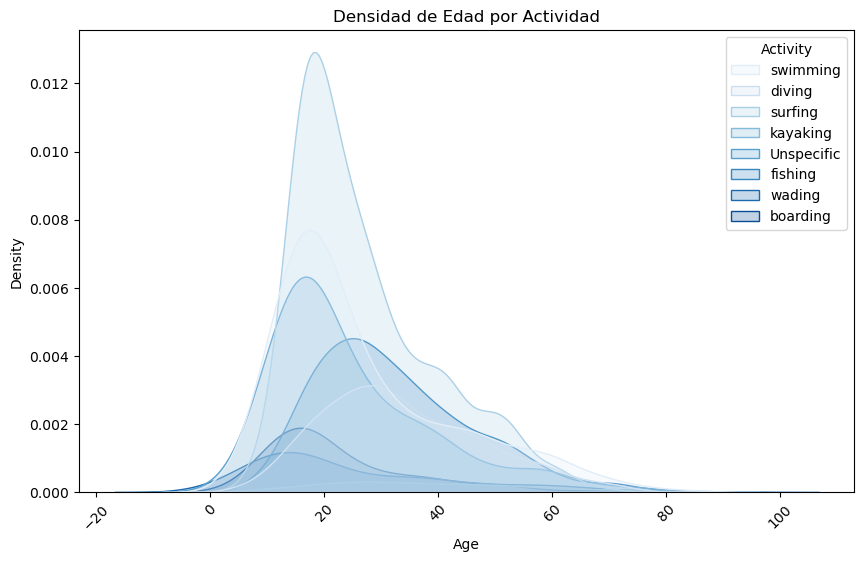

In [16]:
# PRUEBA TERCER GRÁFICO

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Activity', fill=True, palette=sns.color_palette("Blues", 8))
plt.title('Densidad de Edad por Actividad')
plt.xticks(rotation=45)
plt.show()

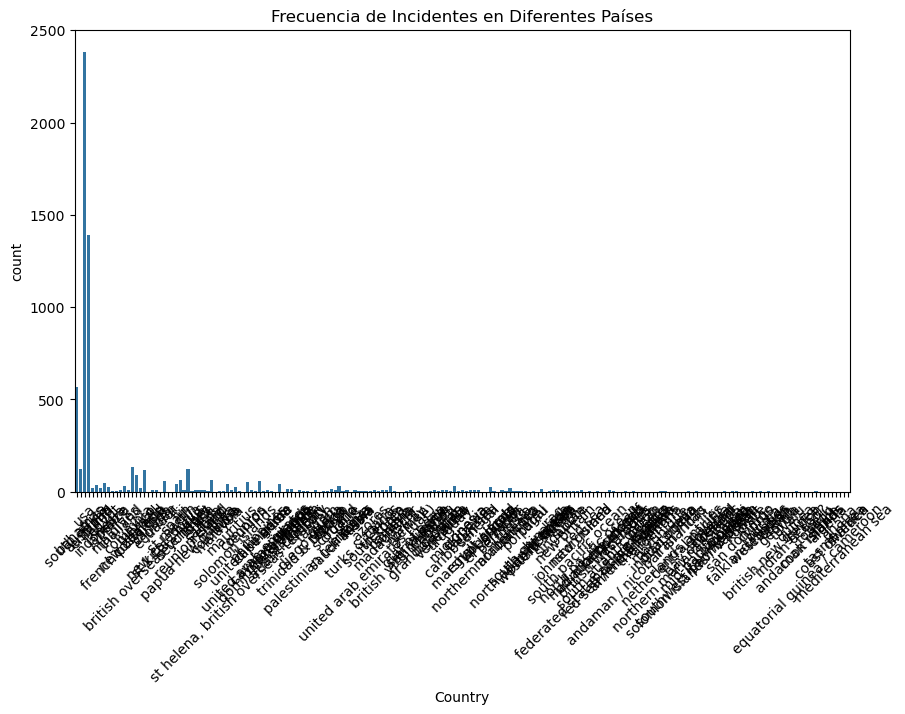

In [19]:
# Gráfico de frecuencia de incidentes en diferentes países
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country')
plt.title('Frecuencia de Incidentes en Diferentes Países')
plt.xticks(rotation=45)
plt.show()

/var/folders/fp/jszwfm992pqbnc932hlygpjr0000gn/T/ipykernel_22524/1188275240.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='Country', palette=sns.color_palette("Blues", top_n))


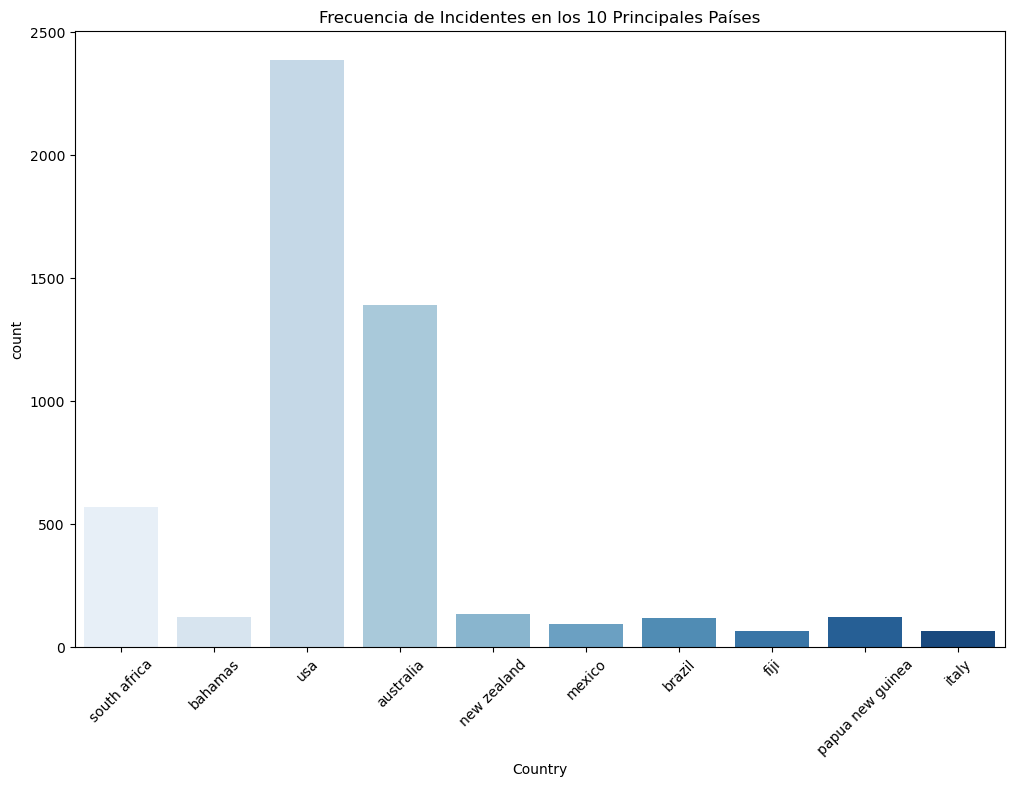

In [25]:
# PRUEBA CUARTO GRÁFICO
# La mejor opción es hacer un top 10

top_n = 10  # Número de países más frecuentes a mostrar
top_countries = df['Country'].value_counts().head(top_n).index
filtered_df = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_df, x='Country', palette=sns.color_palette("Blues", top_n))
plt.title(f'Frecuencia de Incidentes en los {top_n} Principales Países')
plt.xticks(rotation=45)
plt.show()

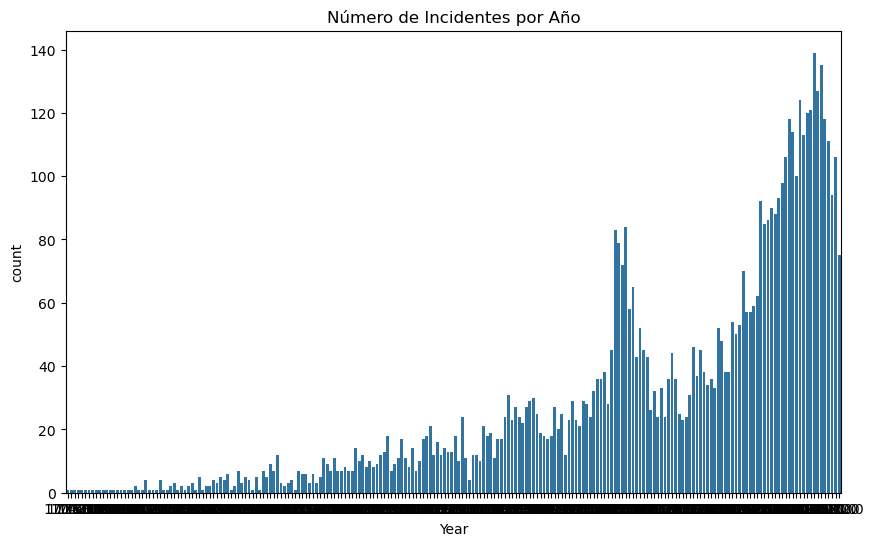

In [26]:
# Tendencia de Incidentes por Año
plt.figure(figsize=(10, 6))
df['Year'] = df['Date'].dt.year
sns.countplot(data=df, x='Year')
plt.title('Número de Incidentes por Año')
plt.show()

/var/folders/fp/jszwfm992pqbnc932hlygpjr0000gn/T/ipykernel_22524/3901843395.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='Year', y=df.groupby('Year').size(), marker='o', palette='Blues')


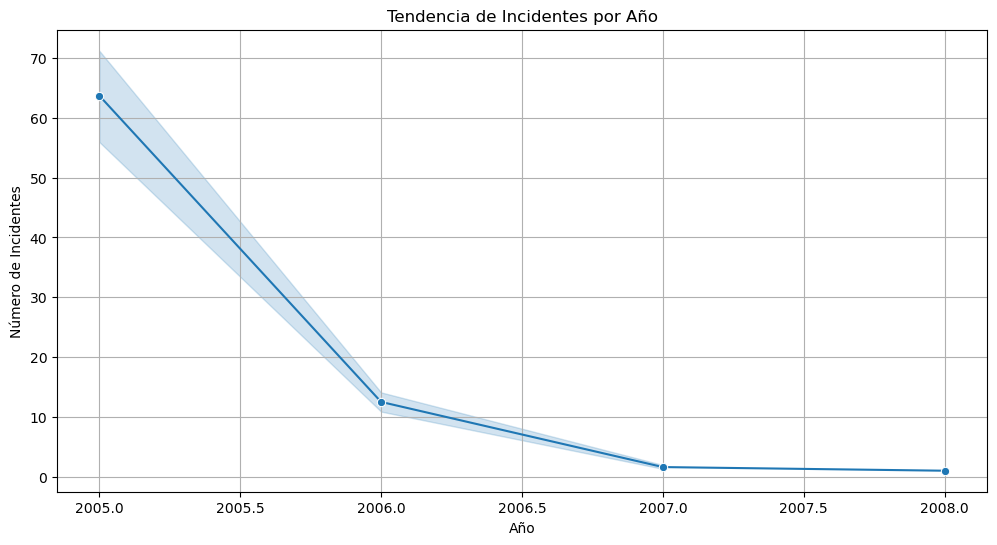

In [27]:
#  PRUEBA QUINTO GRÁFICO

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y=df.groupby('Year').size(), marker='o', palette='Blues')
plt.title('Tendencia de Incidentes por Año')
plt.xlabel('Año')
plt.ylabel('Número de Incidentes')
plt.grid(True)
plt.show()

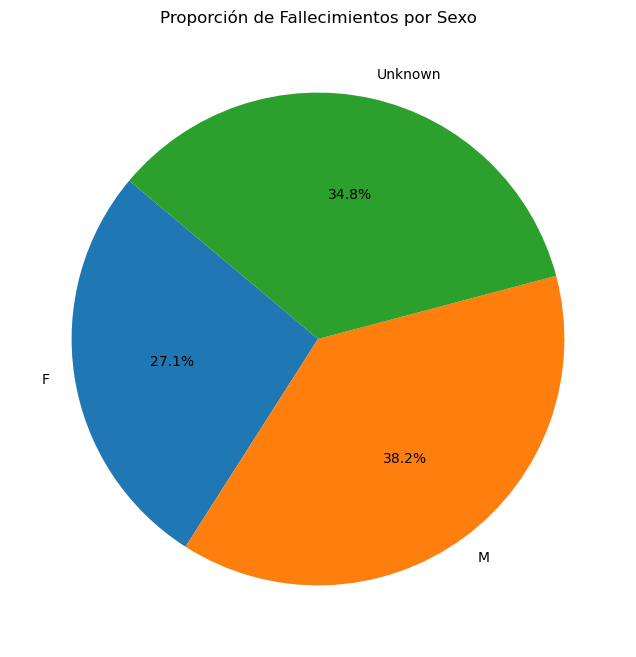

In [28]:
# Proporción de Fallecimientos por Sexo
sex_death_ratio = df.groupby('Sex')['Deceased'].mean().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(sex_death_ratio['Deceased'], labels=sex_death_ratio['Sex'], autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Fallecimientos por Sexo')
plt.show()

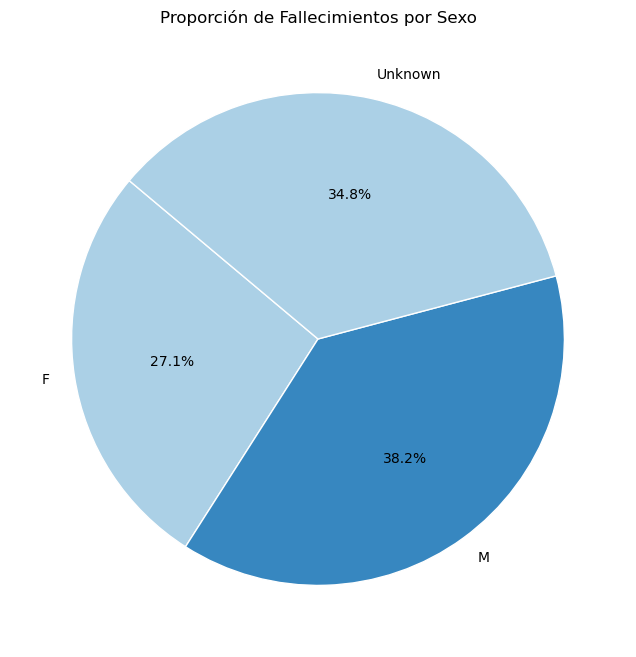

In [29]:
# PRUEBA SEXTO GRÁFICO

# Calcular la proporción de fallecimientos por sexo
sex_death_ratio = df.groupby('Sex')['Deceased'].mean().reset_index()

# Definir una paleta de colores azul
paleta_azul = sns.color_palette("Blues", 2)

# Crear el gráfico de tarta
plt.figure(figsize=(8, 8))
plt.pie(sex_death_ratio['Deceased'], labels=sex_death_ratio['Sex'], autopct='%1.1f%%', 
        startangle=140, colors=paleta_azul, wedgeprops=dict(edgecolor='w'))
plt.title('Proporción de Fallecimientos por Sexo')
plt.show()

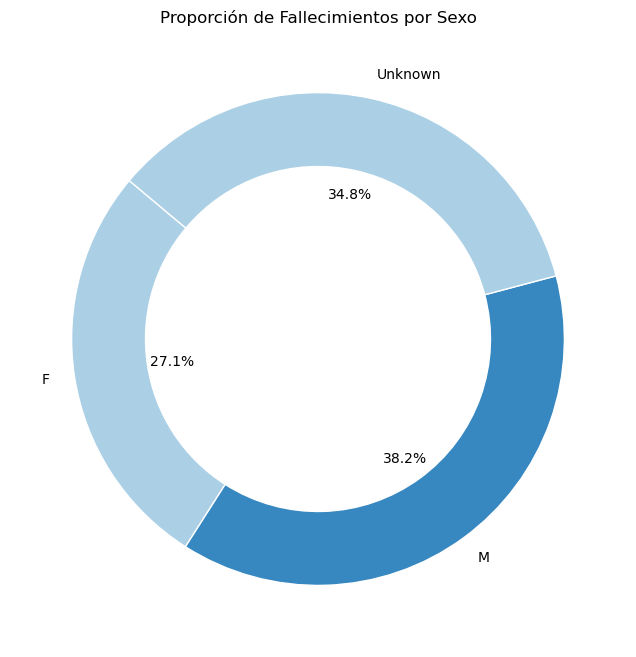

In [31]:
# PRUEBA 2 SEXTO GRÁFICO
from matplotlib.patches import Wedge

# Crear el gráfico de donut
plt.figure(figsize=(8, 8))
plt.pie(sex_death_ratio['Deceased'], labels=sex_death_ratio['Sex'], autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette("Blues", 2), wedgeprops=dict(width=0.3, edgecolor='w'))
plt.title('Proporción de Fallecimientos por Sexo')
plt.show()

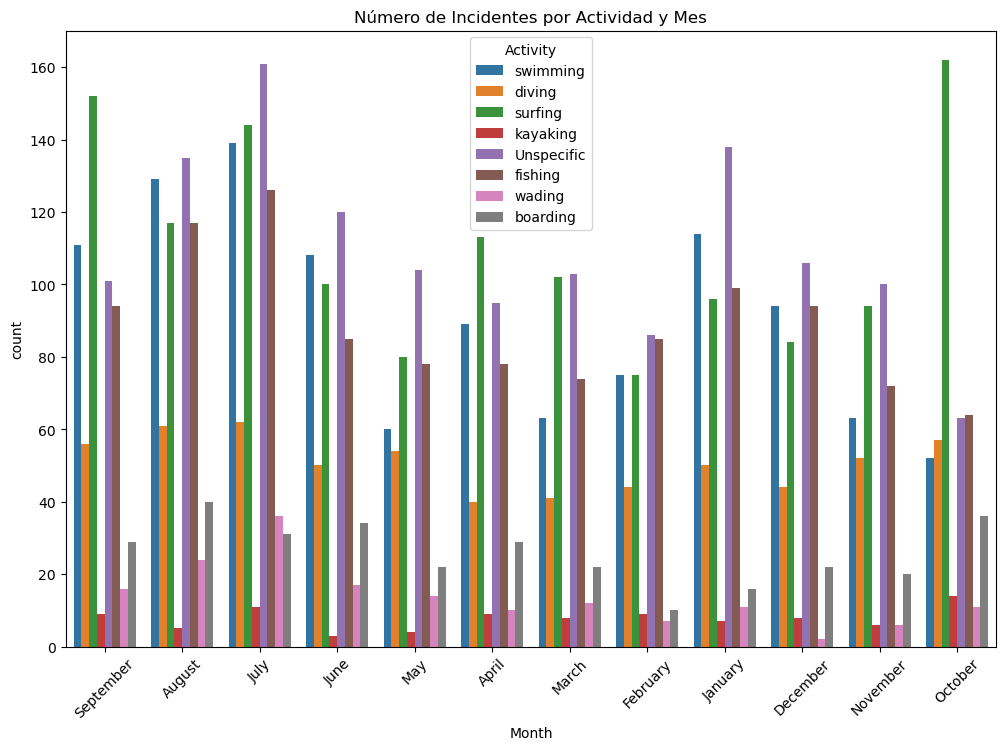

In [16]:
# Número de Incidentes por Actividad y Mes
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Month', hue='Activity')
plt.title('Número de Incidentes por Actividad y Mes')
plt.xticks(rotation=45)
plt.show()

/var/folders/fp/jszwfm992pqbnc932hlygpjr0000gn/T/ipykernel_22524/341592961.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activity_monthly = df.groupby(['Month', 'Activity']).size().unstack().fillna(0)


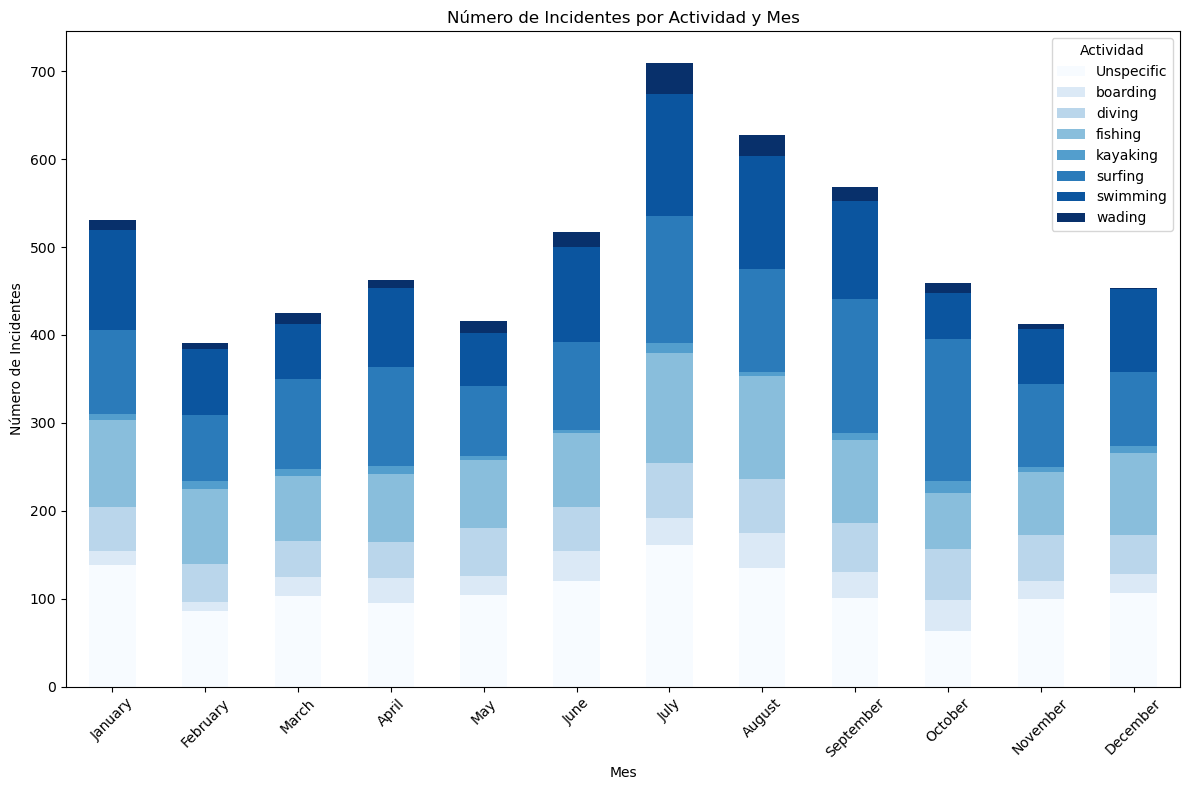

In [32]:
# PRUEBA SEPTIMO GRÁFICO

# Contar incidentes por actividad y mes
activity_monthly = df.groupby(['Month', 'Activity']).size().unstack().fillna(0)

# Crear el gráfico de barras apiladas
activity_monthly.plot(kind='bar', stacked=True, colormap='Blues', figsize=(12, 8))
plt.title('Número de Incidentes por Actividad y Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45)
plt.legend(title='Actividad')
plt.tight_layout()
plt.show()

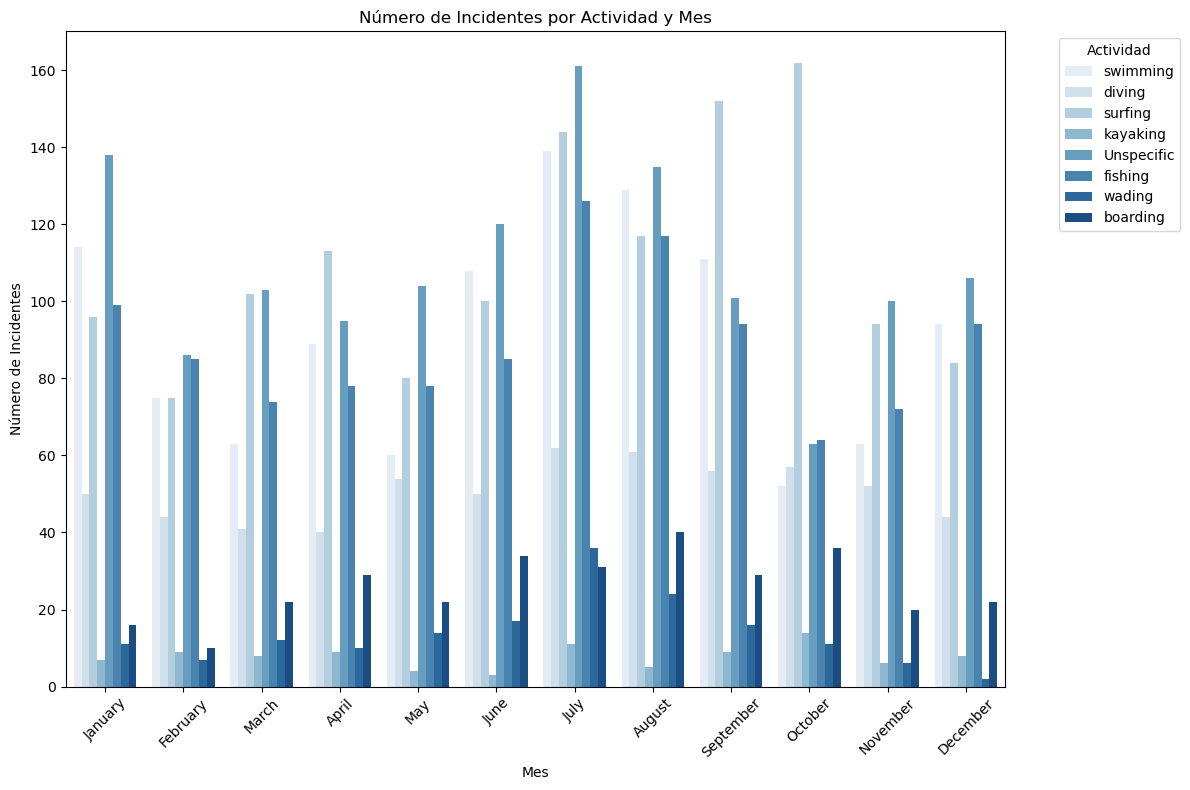

In [36]:
# PRUEBA 2 SEPTIMO GRÁFICO

# Crear el gráfico de barras con paleta de colores azul
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Month', hue='Activity', palette='Blues')
plt.title('Número de Incidentes por Actividad y Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45)
plt.legend(title='Actividad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

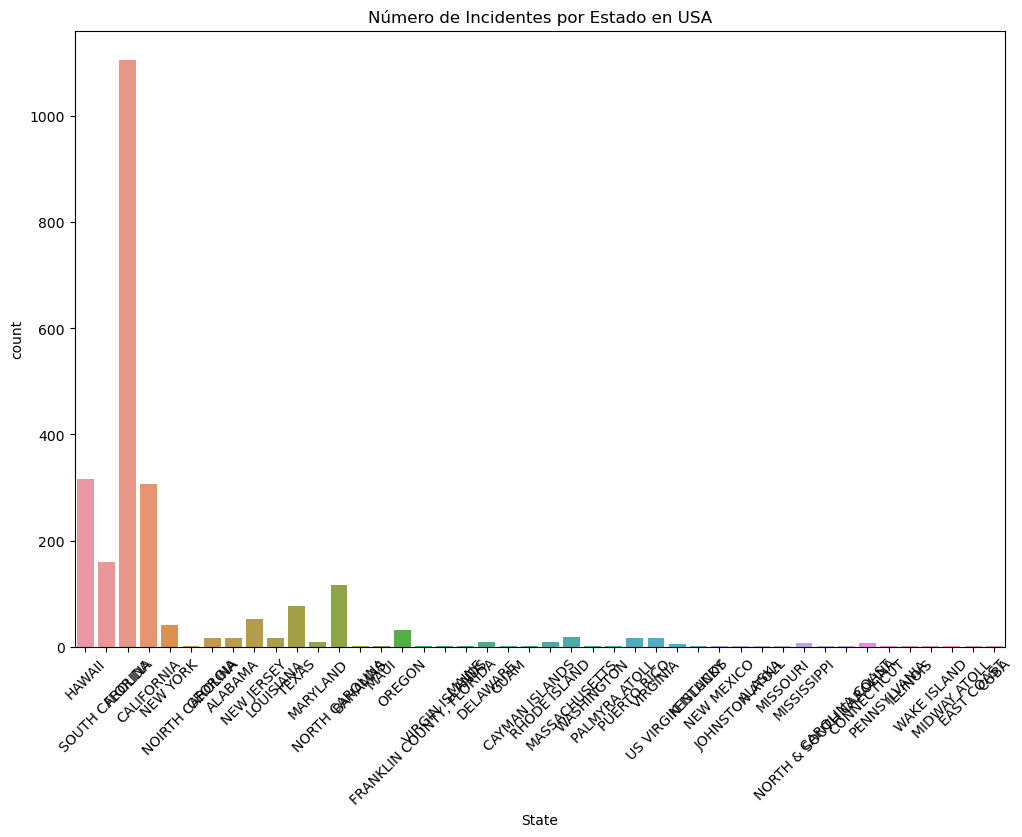

In [17]:
# Incidentes por Estado en un usa
usa_states = df[df['Country'] == 'usa']
plt.figure(figsize=(12, 8))
sns.countplot(data=usa_states, x='State')
plt.title('Número de Incidentes por Estado en USA')
plt.xticks(rotation=45)
plt.show()

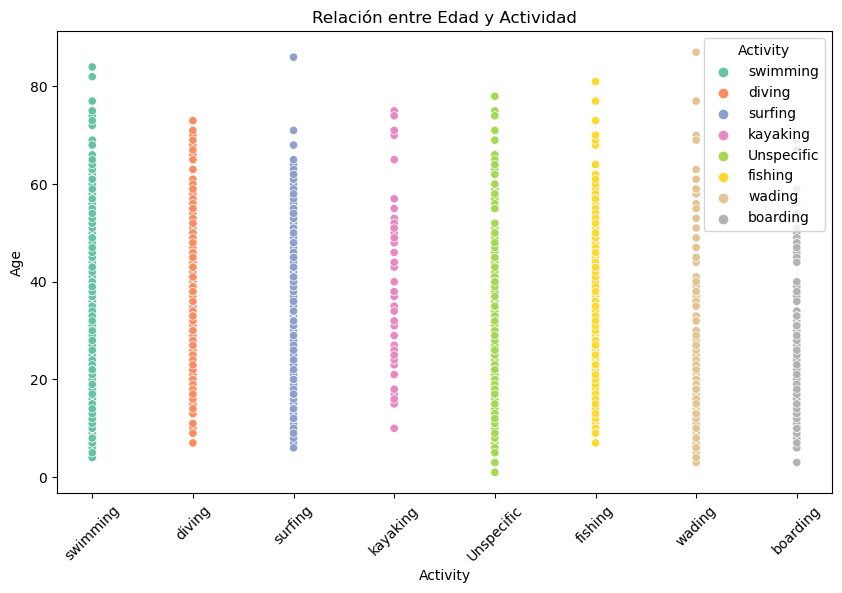

In [18]:
# 6. Relación entre Edad y Actividad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Activity', y='Age', hue='Activity', palette='Set2')
plt.title('Relación entre Edad y Actividad')
plt.xticks(rotation=45)
plt.show()

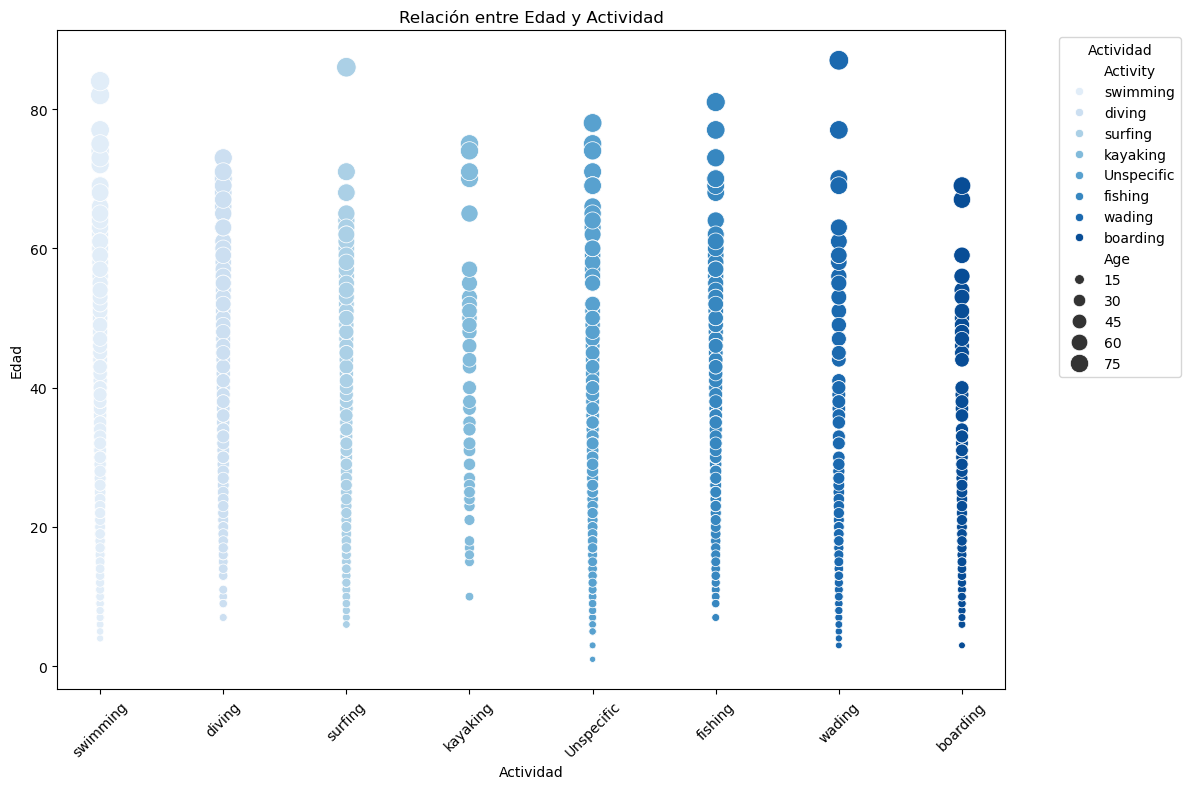

In [37]:
# PRUEBA OCTAVO GRÁFICO
# ES CASI IGUAL QUE EL DE ARRIBA PERO CON CÍRCULOS MÁS GRANDES O PEQUEÑOS

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Activity', y='Age', hue='Activity', palette='Blues', size='Age', sizes=(20, 200))
plt.title('Relación entre Edad y Actividad')
plt.xlabel('Actividad')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.legend(title='Actividad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/fp/jszwfm992pqbnc932hlygpjr0000gn/T/ipykernel_22524/1763319487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Activity', y='Age', palette='Blues')


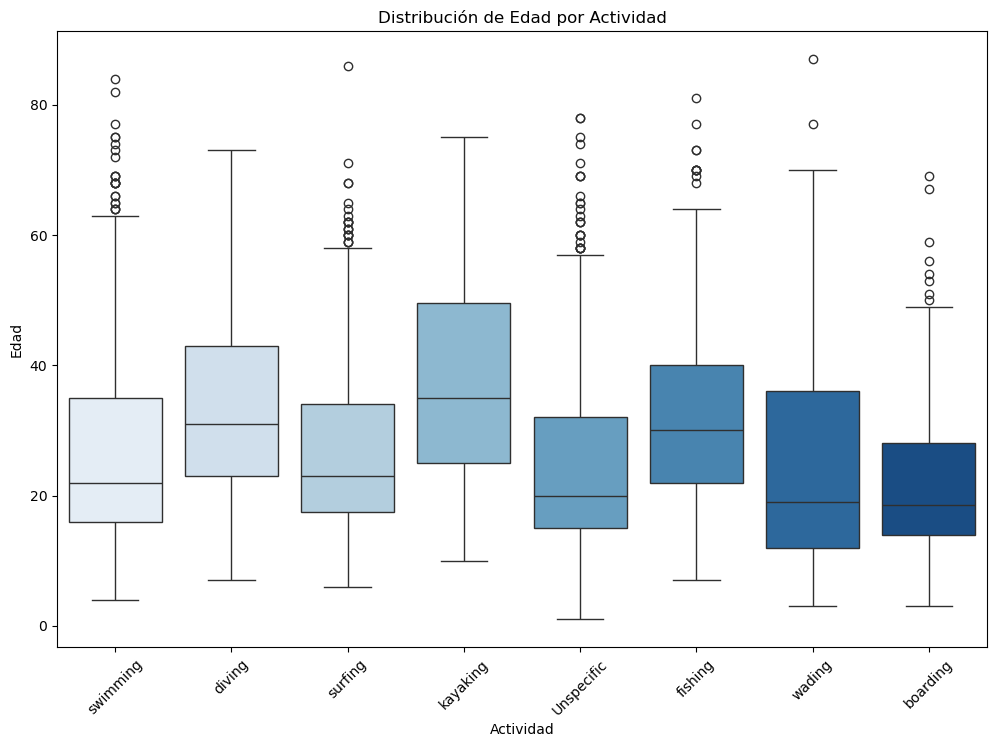

In [38]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Activity', y='Age', palette='Blues')
plt.title('Distribución de Edad por Actividad')
plt.xlabel('Actividad')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.show()

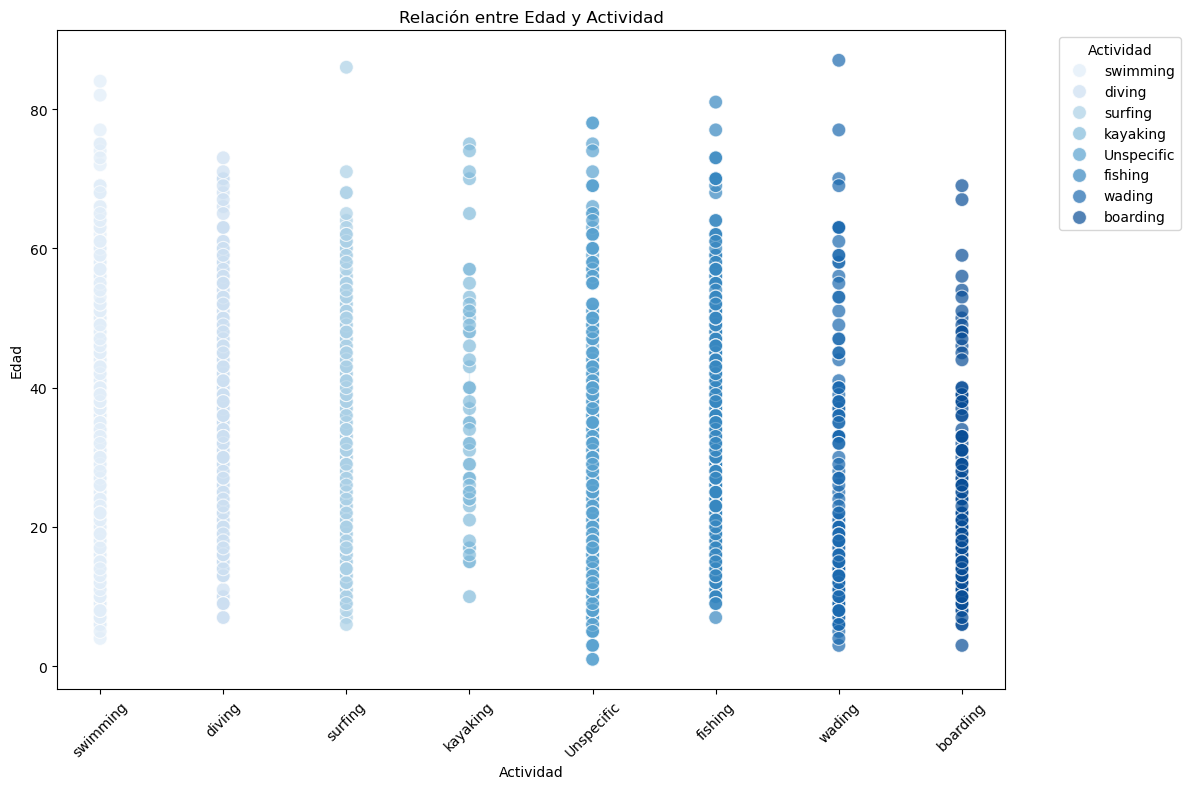

In [39]:
# Crear el gráfico de dispersión con ajuste de tendencia
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Activity', y='Age', hue='Activity', palette='Blues', s=100, edgecolor='w', alpha=0.7)
sns.lineplot(data=df, x='Activity', y='Age', hue='Activity', palette='Blues', estimator='mean', linewidth=2.5, legend=None)
plt.title('Relación entre Edad y Actividad')
plt.xlabel('Actividad')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.legend(title='Actividad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()